## Pregunta 2:
### ¿Existe una correlación significativa entre el número anual de denuncias por violencia intrafamiliar y el número de divorcios registrados? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';', low_memory=False)

In [8]:
#Indicador para divorcios y violecia
df['EVENTO_REAL'] = df.apply(
    lambda row: 'Violencia' if pd.notna(row['VIC_EDAD']) 
    else 'Divorcio',
    axis=1
)
df['EVENTO_REAL'].value_counts()



EVENTO_REAL
Violencia    326105
Divorcio      63694
Name: count, dtype: int64

In [9]:
#Agrupa por año
tabla_anual = (
    df.groupby(['ANO','EVENTO_REAL'])
      .size()
      .unstack(fill_value=0)
)

tabla_anual

#Correlación
correlacion = tabla_anual['Violencia'].corr(tabla_anual['Divorcio'])
correlacion



np.float64(0.3146102827858893)

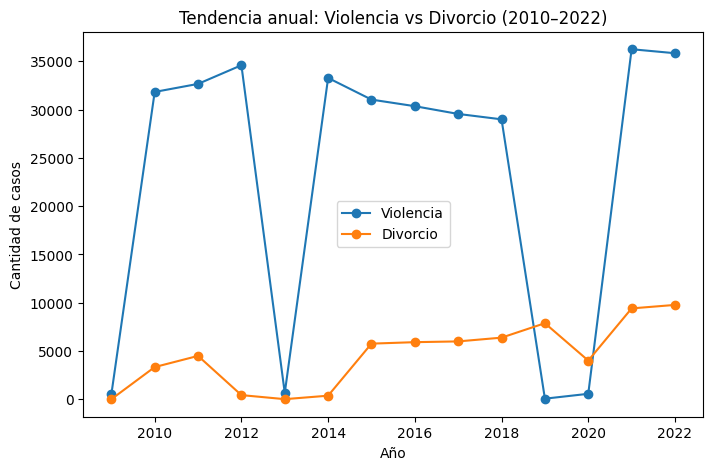

In [10]:
#Gráfico
plt.figure(figsize=(8,5))
plt.plot(tabla_anual.index, tabla_anual['Violencia'], marker='o', label='Violencia')
plt.plot(tabla_anual.index, tabla_anual['Divorcio'], marker='o', label='Divorcio')
plt.legend()
plt.title("Tendencia anual: Violencia vs Divorcio (2010–2022)")
plt.xlabel("Año")
plt.ylabel("Cantidad de casos")
plt.show()